In [2]:
# 실장님께서 Port Congestion에서 가장 중요한 변수는 LA 경로 뿐이라고 말씀해주셔서 학습 변수에 LA 경로만 넣는 것으로 수정
# 로스앤젤레스는 west Coast North America에 위치하기 때문에 port congestion에서는 이것만 사용
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Merge한 데이터 불러오기
data_df =  pd.read_csv('data(20160101~20220107).csv')
print(data_df)
data_df.head()

           Date  SCFI Comprehensive Container Freight Rate Index  \
0    2016-01-01                                           836.96   
1    2016-01-08                                           745.91   
2    2016-01-15                                           680.22   
3    2016-01-22                                           615.77   
4    2016-01-29                                           591.51   
..          ...                                              ...   
302  2021-12-10                                          4810.98   
303  2021-12-17                                          4894.62   
304  2021-12-24                                          4956.02   
305  2021-12-31                                          5046.66   
306  2022-01-07                                          5109.60   

     Shanghai-Europe (base port)  SCFI Shanghai-Med (base port)  \
0                         1232.0                         1257.0   
1                          932.0                 

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
0,2016-01-01,836.96,1232.0,1257.0,1518.0,2555.0,580.0,625.0,1486.0,517.0,...,99.0,2.06,6.30,0.37,0.27,0.68,0.57,2.56,0.75,1.87
1,2016-01-08,745.91,932.0,1022.0,1498.0,2542.0,462.0,743.0,1470.0,523.0,...,99.0,2.09,6.35,0.36,0.32,0.69,0.63,2.49,0.76,1.75
2,2016-01-15,680.22,740.0,869.0,1417.0,2457.0,385.0,640.0,1431.0,549.0,...,99.0,2.09,6.03,0.33,0.27,0.68,0.63,2.34,0.70,1.63
3,2016-01-22,615.77,545.0,629.0,1377.0,2420.0,306.0,563.0,1358.0,530.0,...,99.0,2.09,6.14,0.32,0.27,0.71,0.62,2.36,0.78,1.64
4,2016-01-29,591.51,469.0,488.0,1388.0,2466.0,278.0,525.0,1321.0,502.0,...,99.0,2.09,6.32,0.33,0.29,0.69,0.68,2.49,0.72,1.80


In [4]:
# 2019년 12월 31일 중국 우한에서 첫 확진자가 보고
Corona_data_df=data_df.query('"2019-12-31"<= Date')
print(Corona_data_df.shape)
Corona_data_df.head()

(104, 32)


,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
203,2020-01-03,1022.72,1124.0,1185.0,1636.0,2808.0,1218.0,949.0,2744.0,1159.0,...,98.0,2.19,7.68,0.51,0.32,0.73,0.77,2.83,1.01,2.27
204,2020-01-10,1002.58,1058.0,1179.0,1543.0,2888.0,1175.0,937.0,2873.0,1150.0,...,98.0,2.19,7.75,0.51,0.35,0.78,0.79,2.83,0.99,2.21
205,2020-01-17,990.68,1010.0,1180.0,1562.0,2943.0,1123.0,949.0,2897.0,1084.0,...,98.0,2.19,7.71,0.53,0.31,0.77,0.78,2.88,0.91,2.27
206,2020-01-24,981.19,969.0,1179.0,1545.0,2951.0,1126.0,942.0,2908.0,1087.0,...,98.0,2.18,7.90,0.48,0.37,0.79,0.78,2.99,0.95,2.36
207,2020-02-14,910.58,850.0,1031.0,1423.0,2768.0,1089.0,892.0,2983.0,1066.0,...,98.0,2.17,7.73,0.46,0.37,0.80,0.81,2.79,0.95,2.26


In [6]:
X = Corona_data_df.iloc[:,[15,16,17,20,21,22,26]]
print(X.shape)
X.head()

(104, 7)


,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
203,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
204,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
205,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
206,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
207,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [7]:
# Y데이터 불러오기
y = Corona_data_df.iloc[:, [1]]
y.head()

,SCFI Comprehensive Container Freight Rate Index
203,1022.72
204,1002.58
205,990.68
206,981.19
207,910.58


In [86]:
# 전처리 - MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
data_to_use = Corona_data_df.iloc[:,[1,15,16,17,20,21,22,26]]
data_to_use.head()

,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
203,1022.72,15285.0,289.25,6.8,109.0,41.5,98.0,0.32
204,1002.58,15268.0,297.25,7.0,109.0,41.5,98.0,0.35
205,990.68,15250.0,299.00,7.0,109.0,41.5,98.0,0.31
206,981.19,15161.0,301.00,6.7,109.0,41.5,98.0,0.37
207,910.58,14823.0,289.25,8.5,109.0,41.5,98.0,0.37


In [87]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_to_use)

data_df_scaled = pd.DataFrame(data_scaled)
data_df_scaled.columns = data_to_use.columns
data_df_scaled.head(5)

,SCFI Comprehensive Container Freight Rate Index,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,"Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma"
0,0.047667,0.084985,0.452856,0.380282,0.152174,0.15,0.064516,0.1250
1,0.042974,0.084745,0.474880,0.408451,0.152174,0.15,0.064516,0.1625
2,0.040201,0.084491,0.479697,0.408451,0.152174,0.15,0.064516,0.1125
3,0.037990,0.083235,0.485203,0.366197,0.152174,0.15,0.064516,0.1875
4,0.021536,0.078463,0.452856,0.619718,0.152174,0.15,0.064516,0.1875


In [88]:
# 코로나 이후의 데이터는 총 104주인데 80개까지 학습하고 나머지 20개에 대해서 TEST를 진행

TEST_SIZE = 20

train = data_df_scaled[:-TEST_SIZE]
test = data_df_scaled[-TEST_SIZE:]

In [89]:
# 학습을 시킬 데이터셋 생성

# window_size를 정의하여 학습 데이터를 생성할 예정입니다. window_size는 내가 얼마동안(기간)의 다음날 데이터를를 예측할 것인가를 정하는 parameter
# => 일단 3달로 해볼까? 3달 = 12주 = window_size = 12

def make_dataset(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [90]:
feature_cols = X.columns
label_cols = y.columns

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label,12)
print(train_feature.shape, train_label.shape)
# train, validation set 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.2)
print(X_train.shape, X_test.shape)


(72, 12, 7) (72, 1)
(57, 12, 7) (15, 12, 7)


In [91]:
# test dataset (실제 예측 해볼 데이터)
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label,12)
print(test_feature.shape, test_label.shape)

(8, 12, 7) (8, 1)


In [96]:
# 모델 생성 
# 일단 베껴옴 (https://teddylee777.github.io/tensorflow/LSTM%EC%9C%BC%EB%A1%9C-%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EB%8A%94-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 16)                1536      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________


In [97]:
import os
model_path = 'C:/Users/hyunj/KMI'
# 모델의 학습
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=4,
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
15/15 [==============================] - 6s 101ms/step - loss: 0.1343 - val_loss: 0.0284

Epoch 00001: val_loss improved from inf to 0.02839, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0365 - val_loss: 0.0129

Epoch 00002: val_loss improved from 0.02839 to 0.01293, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0120 - val_loss: 0.0115

Epoch 00003: val_loss improved from 0.01293 to 0.01152, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 4/200
15/15 [==============================] - 0s 24ms/step - loss: 0.0078 - val_loss: 0.0056

Epoch 00004: val_loss improved from 0.01152 to 0.00563, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 5/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0048 - val_loss: 0.0047

Epoch 00005: val_loss improved from 0.00563 to 0.00471, saving m

15/15 [==============================] - 0s 14ms/step - loss: 3.4794e-04 - val_loss: 4.2965e-04

Epoch 00043: val_loss did not improve from 0.00041
Epoch 44/200
15/15 [==============================] - 0s 13ms/step - loss: 7.4379e-04 - val_loss: 4.0313e-04

Epoch 00044: val_loss improved from 0.00041 to 0.00040, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 45/200
15/15 [==============================] - 0s 7ms/step - loss: 3.2242e-04 - val_loss: 3.4694e-04

Epoch 00045: val_loss improved from 0.00040 to 0.00035, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 46/200
15/15 [==============================] - 0s 19ms/step - loss: 3.7140e-04 - val_loss: 3.2631e-04

Epoch 00046: val_loss improved from 0.00035 to 0.00033, saving model to C:/Users/hyunj/KMI\tmp_checkpoint.h5
Epoch 47/200
15/15 [==============================] - 0s 9ms/step - loss: 2.7439e-04 - val_loss: 3.6688e-04

Epoch 00047: val_loss did not improve from 0.00033
Epoch 48/200
15/15 [================

In [98]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

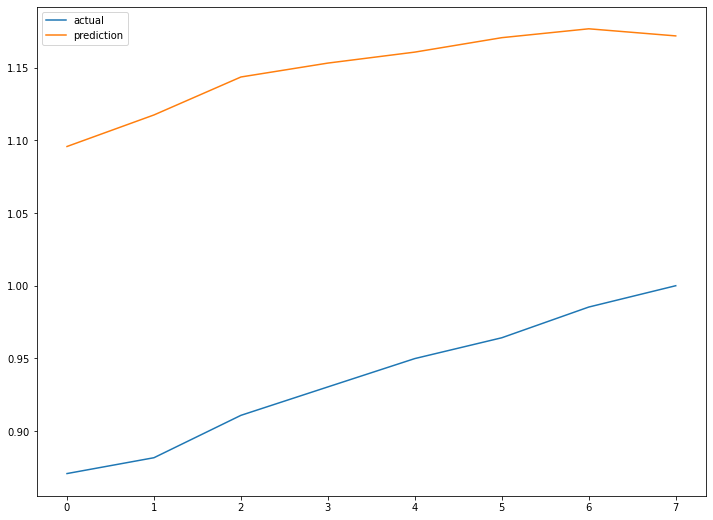

In [99]:
# 실제 데이터와 예측한 데이터 시각화

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()